In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.linear_model import LinearRegression
import itertools
import gc
import os
import sys
%matplotlib inline

In [3]:
cab_data = pd.read_csv('cab_rides.csv')
weather_data = pd.read_csv('weather.csv')

In [4]:
cab_data.columns


Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [5]:
weather_data.columns


Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [10]:
import datetime
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'])
weather_data['datetime'] = pd.to_datetime(weather_data['time_stamp'])

In [11]:
cab_data.shape

(693071, 11)

In [12]:
weather_data.shape

(6276, 9)

In [14]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.892342e+08,9.324359,0.091641
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.280000,1.543440e+12,9.000000,1.000000
50%,2.160000,1.543740e+12,13.500000,1.000000
75%,2.920000,1.544830e+12,22.500000,1.000000
max,7.860000,1.545160e+12,97.500000,3.000000


In [15]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [19]:
a = pd.concat([cab_data,weather_data])
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind
6271,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.72,North Station,0.89,1000.69,NaN,0.96,1.52
6272,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54
6273,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.82,South Station,0.89,1000.70,NaN,0.96,1.54
6274,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54
6275,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.69,West End,0.89,1000.70,NaN,0.96,1.52


In [22]:
a['day'] = a.datetime.dt.day
a['hour'] = a.datetime.dt.hour
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.72,North Station,0.89,1000.69,NaN,0.96,1.52,1,0
6272,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.85,Northeastern University,0.88,1000.71,NaN,0.96,1.54,1,0
6273,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.82,South Station,0.89,1000.70,NaN,0.96,1.54,1,0
6274,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.78,Theatre District,0.89,1000.70,NaN,0.96,1.54,1,0
6275,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:01.543819974,44.69,West End,0.89,1000.70,NaN,0.96,1.52,1,0


In [23]:
a.fillna(0,inplace=True)

In [25]:
a.tail()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
6271,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.72,North Station,0.89,1000.69,0.0,0.96,1.52,1,0
6272,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.85,Northeastern University,0.88,1000.71,0.0,0.96,1.54,1,0
6273,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.82,South Station,0.89,1000.70,0.0,0.96,1.54,1,0
6274,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.78,Theatre District,0.89,1000.70,0.0,0.96,1.54,1,0
6275,0.0,0,1.543820e+09,0,0,0.0,0.0,0,0,0,1970-01-01 00:00:01.543819974,44.69,West End,0.89,1000.70,0.0,0.96,1.52,1,0


In [26]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [31]:
a.groupby('cab_type').count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,day,hour
cab_type,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


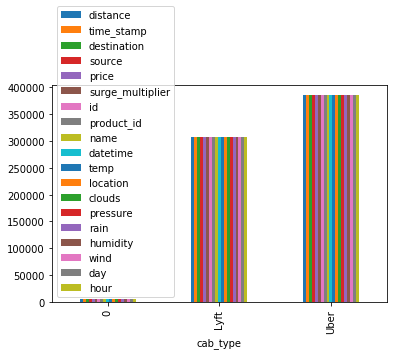

In [32]:
a.groupby('cab_type').count().plot.bar()

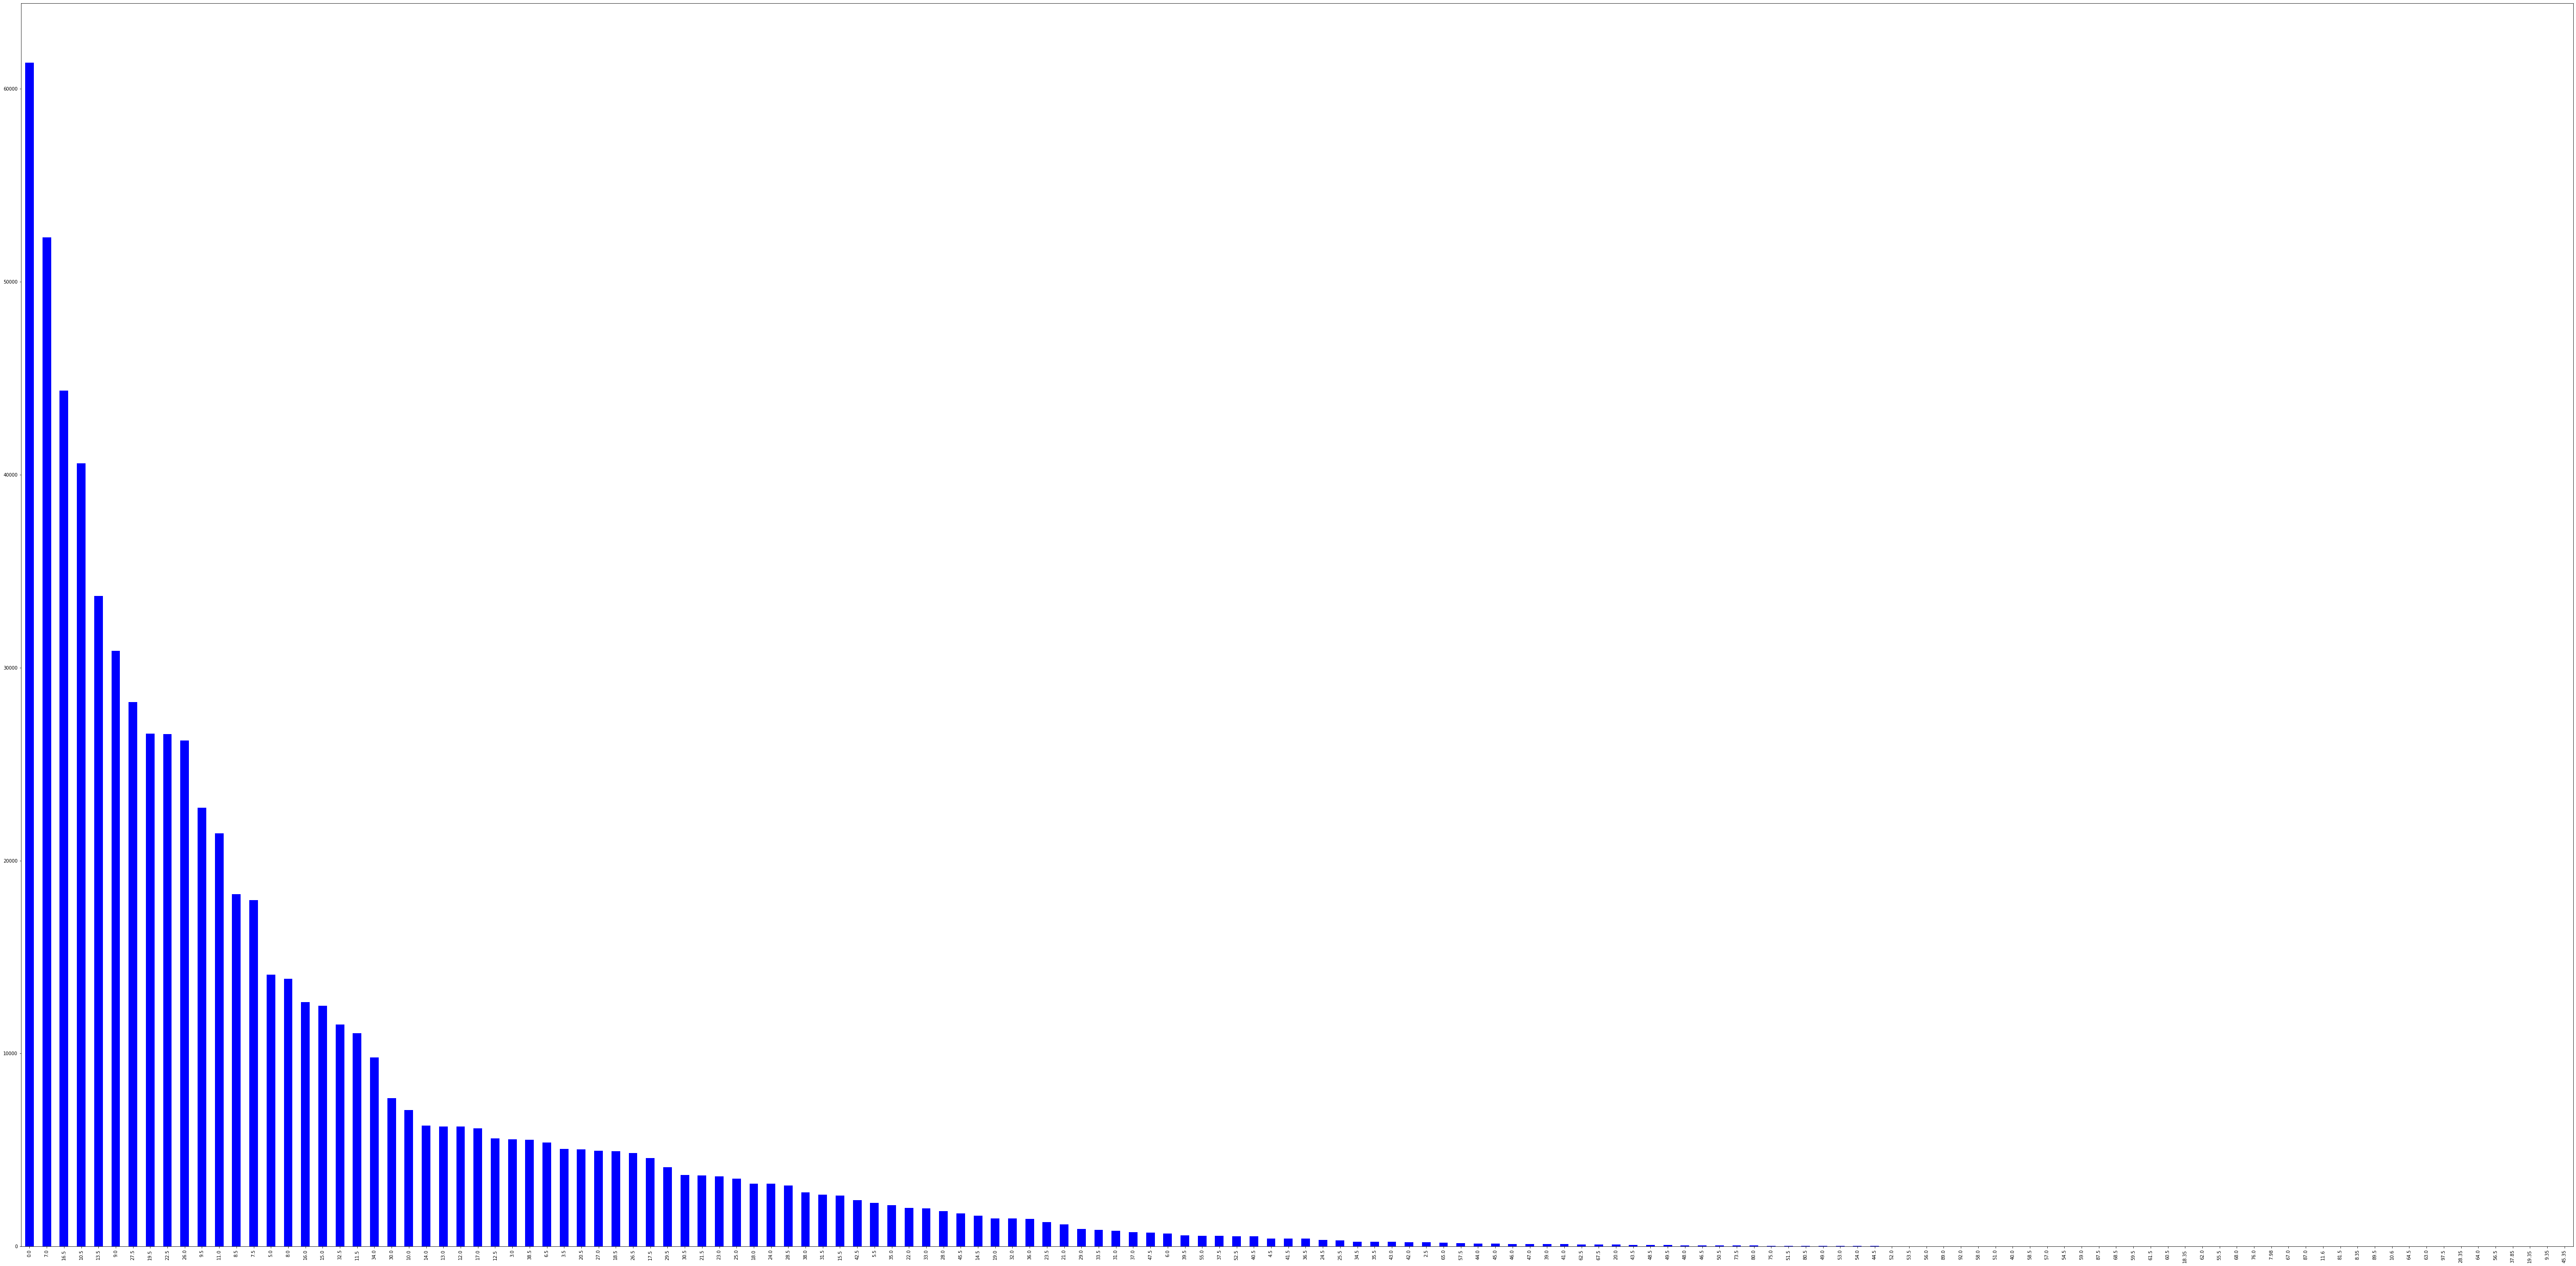

In [37]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

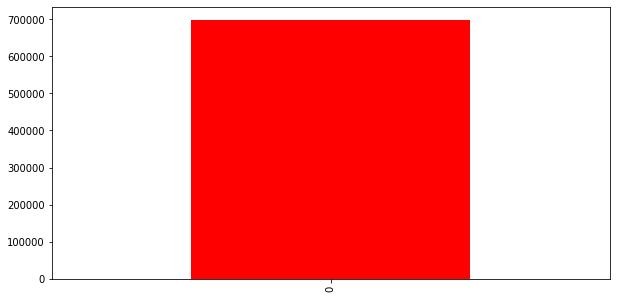

In [40]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color = 'red')

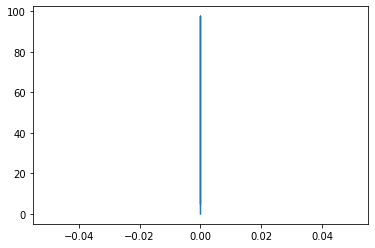

In [41]:
import matplotlib.pyplot as plt
x = a['hour']
y = a['price']
plt.plot(x,y)
plt.show()

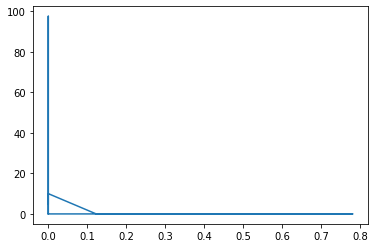

In [42]:
x = a['rain']
y = a['price']
plt.plot(x,y)
plt.show()

In [44]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind', 'day',
       'hour'],
      dtype='object')

In [46]:
x1 = a[['distance','temp','surge_multiplier','clouds','pressure','rain','humidity','day','wind','hour']]
y1 = a['price']

In [47]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x1,y1,test_size = 0.25,random_state=42)

In [48]:
linear = LinearRegression()
linear.fit(x_train,x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
prediction = linear.predict(y_train)
prediction

array([32.54722234, 14.75563929, 16.81698669, ..., 11.82903496,
       11.8544837 , 13.22871529])

In [53]:
df = pd.DataFrame({'Actual':y_test,'predicted':prediction})
df.head()

,Actual,predicted
81607,42.5,32.547222
354,0.0,14.755639
471801,32.5,16.816987
407645,27.5,10.480252
474760,27.5,10.556598


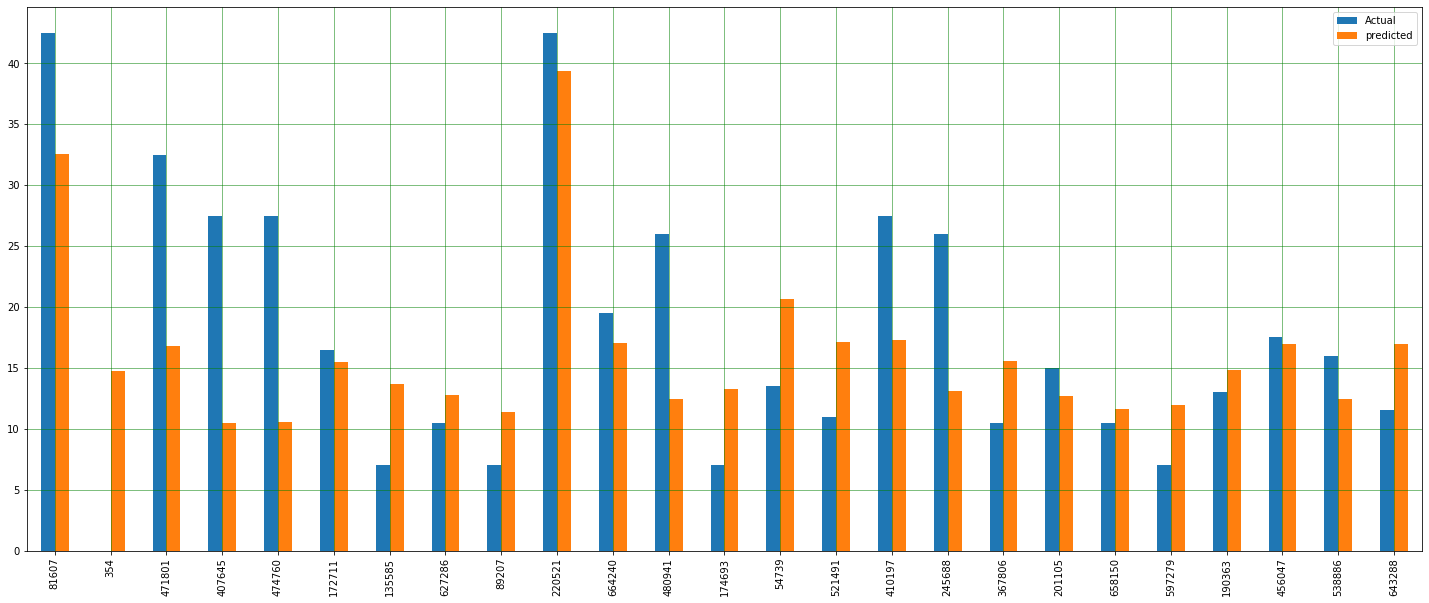

In [56]:
df1 = df.head(25)
df1.plot(kind = 'bar',figsize=(25,10))
plt.grid(which='major',linestyle='-',linewidth ='0.5',color = 'green')
plt.grid(which='minor',linestyle=':',linewidth ='0.5',color = 'black')
plt.show()